# 50.007 Machine Learning HW1
**Name**: Ryan Toh (1005129)

## 2. Linear Classification

### 2*. Setup
This code requires the following Python packages:
- Numpy

Next, run the following cells in order.

In [1]:
# Necessary imports
import numpy as np
from typing import Tuple

# Extract data from CSVs -- credit for CSV extraction code: https://stackoverflow.com/a/3519314
training_data = np.genfromtxt('./data/2/train_1_5.csv', delimiter=',')
test_data = np.genfromtxt('./data/2/test_1_5.csv', delimiter=',')


### 2*. Accuracy Calculation

In [2]:
def get_error(data:np.ndarray, weight:np.ndarray, offset:float)->float:
    """
    Returns the accuracy of the given `weight` and `offset` based on `data`.
    This uses the zero-one loss function.
    """
    # Error checks
    if len(data) == 0:
        raise ValueError("Cannot calculate error from empty data array.")
    if type(data[0]) is not np.ndarray:
        raise TypeError("Data should be a multi-dimensional array.")
    if len(data[0]) <= 1:
        raise ValueError("Data should have a weight dimension.")

    # Calculate error average    
    error_sum = 0
    for d in data:
        x = d[:-1]
        y = d[-1]
        y_pred = weight.dot(x) + offset
        error_full = y * y_pred
        error = 0
        if error_full > 0:
            error = 1
        else:
            error = 0
        error_sum += error
    return error_sum/len(data)
        

### 2*. Perceptron Algorithm
This code cell defines a Perceptron algorithm.

In [3]:
def perceptron_algo(training_data:np.ndarray, epochs:int, initial_weight:np.array=None, initial_offset:float=0)->Tuple[np.ndarray, float]:
    """
    Executes the Perceptron Algorithm on `training_data`, with a total of `epoch` iterations.
    Returns the final weight as a `np.ndarray`.

    Note that this assumes that the final value of each array in `training_data` is the class label.
    """
    # Error Checks
    if len(training_data) == 0:
        raise ValueError("Training data is empty")
    if type(training_data[0]) is not np.ndarray:
        raise TypeError("Training data should be a multi-dimensional array.")
    if len(training_data[0]) <= 1:
        raise ValueError("Training data should have a dimension containing both the input and the class label.")

    # Checks on initial weight
    if initial_weight is None:
        # Set initial weight to be all zeros, matching the x vector.
        initial_weight = np.zeros(len(training_data[0]) - 1)
    elif len(initial_weight) != len(training_data[0]) - 1:
        raise ValueError("Initial weight provided does not match dimension of training values.")
    
    weight = initial_weight
    offset = initial_offset
    for k in range(0, epochs):
        # Loop through entire set of training data
        for d in training_data:
            x = d[:-1]
            y = d[-1]
            y_pred = weight.dot(x) + offset

            # print(x, y, y_pred)

            # check if prediction is correct
            if y * y_pred > 0:
                continue
            else:
                # Classification mistake made
                weight = np.add(weight, np.dot(y, x))
                offset += y
    
    return weight, offset

### 2a.) Algorithm run for 1 epoch

In [4]:
# Execute Perceptron Algorithm for 1 epoch.
weight, offset = perceptron_algo(
    training_data=training_data,
    epochs=1
)

if weight is None:
    print("Exceeded epochs. No such classifier found.")
else:
    print(f"Weight: {weight}\nOffset: {offset}\nAccuracy: {get_error(test_data, weight, offset)}")

Weight: [-2.12964897 -5.11077037]
Offset: 0.0
Accuracy: 0.9839034205231388


### 2b.) Algorithm run for 5 epochs.

In [5]:
# Execute Perceptron Algorithm for 5 epochs.
weight, offset = perceptron_algo(
    training_data=training_data,
    epochs=5
)

if weight is None:
    print("Exceeded epochs. No such classifier found.")
else:
    print(f"Weight: {weight}\nOffset: {offset}\nAccuracy: {get_error(test_data, weight, offset)}")

Weight: [-0.67838976 -9.99537055]
Offset: 2.0
Accuracy: 0.9798792756539235


## 3. Linear and Polynomial Regression

### 3*. Setup
This code requires the following Python packages:
- Numpy
- MatPlotLib

Next, run the following cells in order.

In [6]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

# Extract data from DAT files
input_data  = np.fromfile('./data/3/hw1x.dat', dtype=np.float64, sep="\n")
output_data = np.fromfile('./data/3/hw1y.dat', dtype=np.float64, sep="\n")

# Zip data into a combined multidimensional array, such that:
## feature vectors are stacked as rows, i.e. `data` has n columns and 3 rows
## shape will be (200, 3)
ones = np.ones(len(input_data))
data = np.stack([input_data, ones, output_data]).transpose()

### 3*. Training Error Calculation

In [7]:
def get_empirical_risk(data: np.ndarray, weight: np.ndarray) -> float:
    """
    Returns the empirical risk of the given weight with the given data.
    - This uses the least squares criterion, and assumes the agreement Z = Y - (X^T Theta).
    """
    x = np.array([
        v[:-1] for v in data
    ])
    y = np.array([
        v[-1] for v in data
    ])
    n = len(y)

    # Y - (X^T Theta)
    difference_vector = np.subtract(y, np.matmul(x, weight))

    # (Y - (X^T Theta))^2
    squared_difference = np.matmul(np.transpose(difference_vector), difference_vector)


    return (1/(2*n)) * squared_difference


### 3a.) Closed Form Linear Regression Formula

In [8]:
def linear_regression_closedform(data: np.ndarray) -> np.ndarray:
    """
    Returns the weight vector using closed form linear regression.
    Note that this assumes that the final value of each array in `data` is the output value.
    """
    # Error Checks
    if len(data) == 0:
        raise ValueError("Data is empty")
    if type(data[0]) is not np.ndarray:
        raise TypeError("Data should be a multi-dimensional array.")
    if len(data[0]) <= 1:
        raise ValueError("Data should contain both input and output values.")
    
    # Defining the variables -- y is the output and will be the final value of each vector in the `data` set.
    x = np.array([
        v[:-1] for v in data
    ])
    y = np.array([
        v[-1] for v in data
    ])
    n = len(y)

    # (d x d) matrix, A
    A = (1/n) * np.matmul(x.transpose(), x)
    
    # (d x 1) column vector b
    b = (1/n) * np.matmul(x.transpose(), y)
    
    try:
        A_inv = np.linalg.inv(A)
        theta = np.matmul(A_inv, b)
        return theta
    except np.linalg.LinAlgError:
        raise ValueError("Matrix A is not invertible.")
    

Weight: [1.78157138 3.2447227 ]
Error: 0.5812605752543937


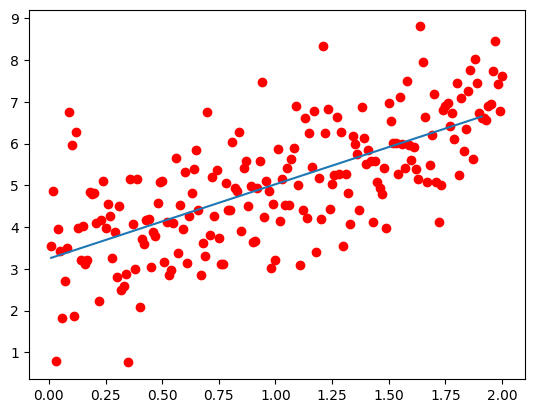

In [9]:
# Report Weight Vector, and display the graph.
weight = linear_regression_closedform(data)
print(f"Weight: {weight}")
print(f"Error: {get_empirical_risk(data, weight)}")

# Plot example data points with red circles
plt.plot(input_data, output_data, 'ro')

x_cont = np.arange(np.min(input_data), np.max(input_data), 0.1)
y_cont = np.multiply(weight[0], x_cont) + weight[1]

# Plot linear regression line with blue line
plt.plot(x_cont, y_cont)

### 3b.) Gradient Descent Linear Regression

#### 3bi.) Batch Gradient Descent

In [10]:
def linear_regression_batchgradientdescent(data: np.ndarray, initial_weight: np.ndarray = None, learning_rate: float = 0.005, epochs: int = 5) -> np.ndarray:
    """
    Returns the weight vector using batch gradient descent.
    Note that this assumes that the final value of each array in `data` is the output value.
    """
    # Error Checks
    if len(data) == 0:
        raise ValueError("Data is empty")
    if type(data[0]) is not np.ndarray:
        raise TypeError("Data should be a multi-dimensional array.")
    if len(data[0]) <= 1:
        raise ValueError("Data should contain both input and output values.")
    
    # Defining the variables -- y is the output and will be the final value of each vector in the `data` set.
    x = np.array(
        [v[:-1] for v in data]
    )
    y = np.array(
        [v[-1] for v in data]
    )
    n = len(data) # number of example datums
    d = len(x[0]) # number of features

    weight = np.zeros(d)
    if initial_weight is not None:
        if len(initial_weight) == d:
            weight = initial_weight
        else:
            raise ValueError("Dimension of initial weight does not match number of features.")
    
    def risk_gradient(data: np.ndarray, weight: np.ndarray) -> np.ndarray:
        """
        Returns the gradient of the empirical risk, based on the entire data
        """
        x = np.array(
            [v[:-1] for v in data]
        )
        y = np.array(
            [v[-1] for v in data]
        )

        # Y - (X Theta)
        difference_vector = np.subtract(y, np.matmul(x, weight))

        # X^T(Y - (X Theta))
        gradient_vector = -np.matmul(x.transpose(), difference_vector)
        return gradient_vector

    for k in range(epochs):
        risk_g = risk_gradient(data, weight)
        weight = weight - ((learning_rate/n)*risk_g)
    return weight

Weight: [0.13822604 0.12322976]
Error: 12.422373711732249


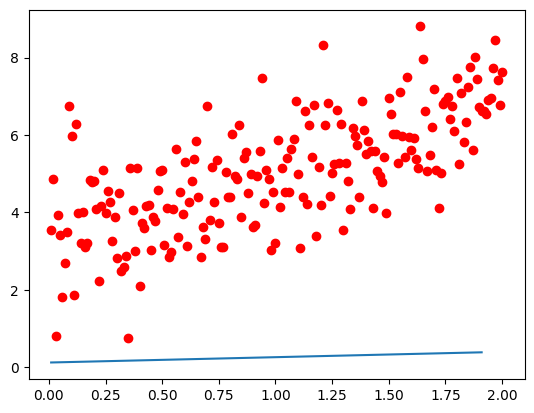

In [11]:
# Report Weight Vector, and display the graph.
weight = linear_regression_batchgradientdescent(
    data, 
    learning_rate=0.005, 
    epochs=5
)
print(f"Weight: {weight}")
print(f"Error: {get_empirical_risk(data, weight)}")

# Plot example data points with red circles
plt.plot(input_data, output_data, 'ro')

x_cont = np.arange(np.min(input_data), np.max(input_data), 0.1)
y_cont = np.multiply(weight[0], x_cont) + weight[1]

# Plot linear regression line with blue line
plt.plot(x_cont, y_cont)

#### 3bii.) Stochastic Gradient Descent

In [12]:
from random import randrange

def linear_regression_stochasticgradientdescent(data: np.ndarray, initial_weight: np.ndarray = None, epochs: int = 5) -> np.ndarray:
    """
    Returns the weight vector using stochastic gradient descent.
    Note that this assumes that the final value of each array in `data` is the output value.
    """
    # Error Checks
    if len(data) == 0:
        raise ValueError("Data is empty")
    if type(data[0]) is not np.ndarray:
        raise TypeError("Data should be a multi-dimensional array.")
    if len(data[0]) <= 1:
        raise ValueError("Data should contain both input and output values.")
    
    # Defining the variables
    n = len(data) # number of example datums
    d = len(data[0])-1 # number of features
    k = 0

    weight = np.zeros(d)
    if initial_weight is not None:
        if len(initial_weight) == weight:
            weight = initial_weight
        else:
            raise ValueError("Dimension of initial weight does not match number of features.")

    for k in range(epochs*n):
        learning_rate = 1/(k+1)
        # Randomly select an example datum
        datum_i = randrange(0, len(data)) # select the index so we can perform replacement
        datum = data[datum_i]
        x = datum[:-1]
        y = datum[-1]

        risk_g = -(y - np.dot(weight, x)) * x

        weight = weight - (learning_rate*risk_g)
    return weight

Weight: [2.62232509 2.26748987]
Error: 0.7078171490770292


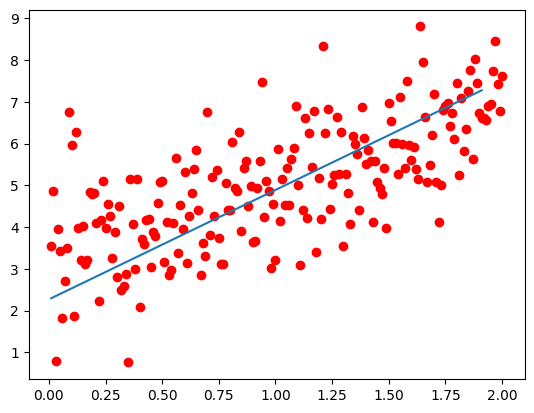

In [13]:
# Report Weight Vector, and display the graph.
weight = linear_regression_stochasticgradientdescent(
    data, 
    epochs=5
)
print(f"Weight: {weight}")
print(f"Error: {get_empirical_risk(data, weight)}")

# Plot example data points with red circles
plt.plot(input_data, output_data, 'ro')

x_cont = np.arange(np.min(input_data), np.max(input_data), 0.1)
y_cont = np.multiply(weight[0], x_cont) + weight[1]

# Plot linear regression line with blue line
plt.plot(x_cont, y_cont)

### 3c.) Polynomial Regression

In [14]:
# Add features x^2, x^3, ..., x^d to the inputs

# Extract data from DAT files
input_data  = np.fromfile('./data/3/hw1x.dat', dtype=np.float64, sep="\n")
output_data = np.fromfile('./data/3/hw1y.dat', dtype=np.float64, sep="\n")

# Zip data into a combined multidimensional array, such that:
## feature vectors are stacked as rows, i.e. `data` has n columns and 3 rows
## shape will be (200, 3)


def poly_regress(x: np.ndarray, y: np.ndarray, d: int) -> Tuple[np.ndarray, float]:
    """
    Takes `x`, `y` and a `d` value to get a `d`th order fit of the data.
    Returns the weight array and error by applying the closed form solution for polynomial regression.
    """
    ones = np.ones(len(input_data))
    arrays = [x]

    for i in range(2, d+1):
        new_arr = np.power(input_data, i)
        arrays.append(new_arr)
    arrays.append(ones)
    arrays.append(y)
    data = np.stack(arrays).transpose()

    weight = linear_regression_closedform(data)
    error = get_empirical_risk(data, weight)

    return weight, error


d=2: Error: 0.5703016121648224
d=3: Error: 0.570084436469135
d=4: Error: 0.5646163879286425
d=5: Error: 0.5638968184749197
d=6: Error: 0.5613433038902952
d=7: Error: 0.556235251582056
d=8: Error: 0.5537805800011253
d=9: Error: 0.5529231399163058
d=10: Error: 0.5525904193678722
d=11: Error: 0.8099977325309439
d=12: Error: 87.08389584666132
d=13: Error: 2.0521936821743707
d=14: Error: 22.882657979621257
d=15: Error: 2336.1890036922687


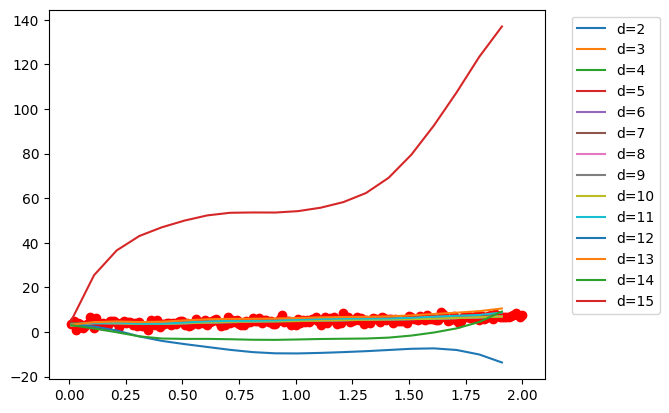

In [15]:
# Plot example data points with red circles
plt.plot(input_data, output_data, 'ro')

# Get graph data
x_cont = np.arange(np.min(input_data), np.max(input_data), 0.1)
ones_cont = np.ones(len(x_cont))

# Get weights for each d
for d in range(2, 16):
    weight, error = poly_regress(input_data, output_data, d)

    # Add arrays for plotting y_continuous
    arrays = [x_cont]
    ## Add continuous values for x^2, x^3, ..., x^d
    for i in range(2, d+1):
        new_arr = np.power(x_cont, i)
        arrays.append(new_arr)
    ## Add ones array
    arrays.append(ones_cont)

    # Form matrix, and obtain output values for plotting
    data_cont = np.stack(arrays).transpose()
    y_cont = np.matmul(data_cont, weight)
    plt.plot(x_cont, y_cont, label=f"d={d}")

    # Output weight and error
    print(f"d={d}: Error: {error}")

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left") # reference used for placing legend outside of graph: https://stackoverflow.com/a/43439132
plt.show()


The training error begins to get worse beyond $d=10$. 

## 4. Ridge Regression

### 4*. Setup
This code requires the following Python packages:
- Numpy
- MatPlotLib

Next, run the following cells in order.

In [16]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt

# Extract data from DAT files
input_data  = np.genfromtxt('./data/4/hw1_ridge_x.dat', dtype=np.float64, delimiter=',')
output_data = np.genfromtxt('./data/4/hw1_ridge_y.dat', dtype=np.float64, delimiter=',')

# Split data into training and validation sets
## Transposition is to ensure that X is a matrix where feature vectors are stacked as rows (n rows, d columns)
split_index = 40
tX =  input_data[:split_index]
tY = output_data[:split_index]
vX =  input_data[split_index:]
vY = output_data[split_index:]

### 4a.) Ridge Regression Code

In [17]:
def ridge_regression(tX: np.ndarray, tY: np.ndarray, l: float) -> np.ndarray:
    """
    Performs ridge regression on `tX` and `tY` with the regularisation parameter `l`.
    Returns the exact solution.
    """
    # d: Number of features, n: Number of example data
    n, d = tX.shape
    
    # (d x d) matrix, A = (lI + (1/n)X^T X) = (1/n)(nlI + X^T X)
    x_squared = np.matmul(tX.transpose(), tX)   # (n, d) * (d, n) gives (d, d) matrix
    nlI = (n*l) * np.identity(d)                # A is a dxd matrix
    A = (1/n) * (nlI + x_squared)
    
    # (d x 1) column vector b
    b = (1/n) * np.matmul(tX.transpose(), tY)
    
    try:
        A_inv = np.linalg.inv(A)
        theta = np.matmul(A_inv, b)
        return theta
    except np.linalg.LinAlgError:
        raise ValueError("Matrix A is not invertible.")
    

In [18]:
l = 0.25
weight = ridge_regression(tX, tY, l)
print(f"Resultant weight given lambda of {l}: {weight}")

Resultant weight given lambda of 0.25: [-0.53708913  1.05482045 -0.0049967  -1.46933566]


### 4b.) Graphs of validation loss and training loss

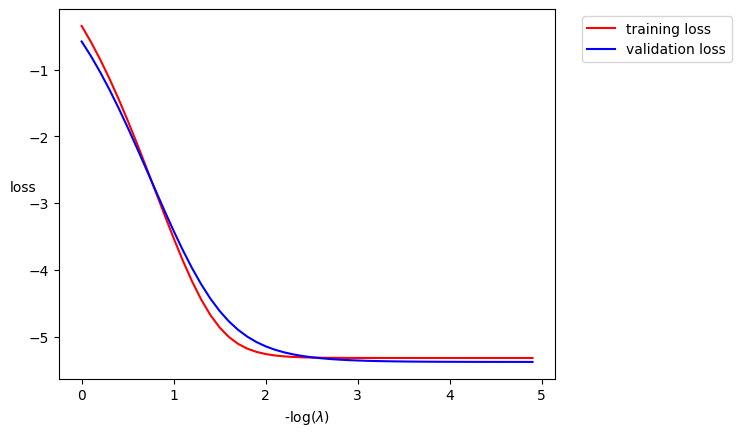

In [19]:
# Code taken from /data/hw1q4_plot_samplecode.py
import numpy as np
import matplotlib.pyplot as	plt

tn = tX.shape[0]
vn = vX.shape[0]

tloss = []
vloss = []
index = np.arange(0, 5, 0.1)

for	i in index:
    w =  ridge_regression(tX, tY, 10**-i)
    tloss = tloss + [np.sum((np.dot(tX, w) - tY)**2)/tn/2]
    vloss = vloss + [np.sum((np.dot(vX, w) - vY)**2)/vn/2]
plt.plot(index, np.log(tloss), 'r', label='training loss')
plt.plot(index, np.log(vloss), 'b', label='validation loss')
plt.xlabel('-log($\lambda$)')
plt.ylabel('loss', rotation=0)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

$\lambda=10^{-2.5}\approx 0.00316$.